CNN

In [137]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Load Dataset

In [138]:
mnist = tf.keras.datasets.mnist
(train_data,train_label),(test_data,test_label) = mnist.load_data()

In [139]:
train_data.shape

(60000, 28, 28)

In [140]:
test_data.shape

(10000, 28, 28)

In [141]:
train_label.shape

(60000,)

Normalize data

In [142]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Function to display images

In [143]:
def display_images(data,label,n=25,pred=None):
    '''Function to display images'''
    a = int( np.ceil(np.sqrt(n))) # calculate the value for subplot nrows and ncols
    for i in range(n):
        idx = np.random.randint(low=0,high=data.shape[0]+1)
        plt.subplot(a,a,i+1)
        plt.axis('off')
        plt.imshow(data[idx])
        plt.title(f"{label[idx]}" if pred is None else f"(A:{label[idx]},P:{pred[idx]})")
    plt.tight_layout()
    plt.show()

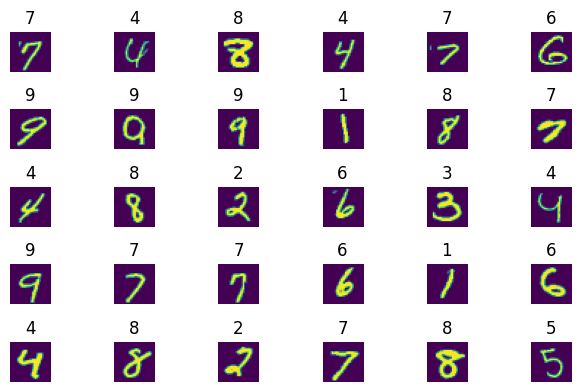

In [144]:
display_images(train_data,train_label,30)

Initialize and compile model

In [145]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    # convolution layer(create a 3X3 matrix and multiply it with corresponding value in the image matrix)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # max filtering (filter the maximum value from each 2X2 matrix and replace that matrix by that single value)
    tf.keras.layers.MaxPooling2D(2, 2),
    # repeat
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    # flatten the input into one dimensional
    tf.keras.layers.Flatten(),
    # create a hidden dense layer
    tf.keras.layers.Dense(units=128, activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=10, activation='softmax')
])
# compile model using adam optimizer and spatialcategoricalentropy as loss function and accuray as metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

CutomCallbacks

In [146]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['loss'] < 0.1 and logs['accuracy'] > 0.98:
            self.model.stop_training = True

Train model

In [147]:
model.fit(train_data,train_label,epochs=100,callbacks=[CustomCallback()])

Epoch 1/100
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1211 - accuracy: 0.9627
Epoch 2/100
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0386 - accuracy: 0.9880


Inference Model

In [148]:
predictions = model.predict(test_data)

313/313 [==============================] - 4s 11ms/step


Select Predicted Class

In [149]:
predicted_classes = np.argmax(predictions,axis=1)

Verify Predictions

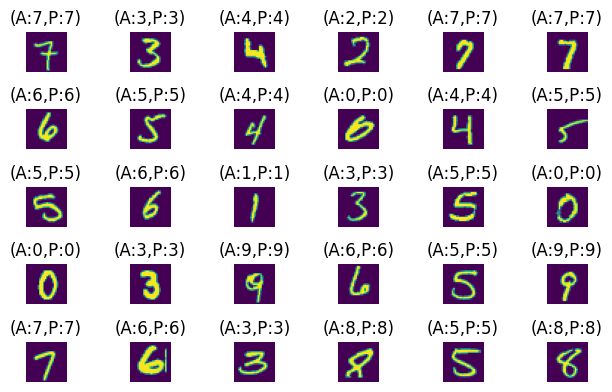

In [150]:
display_images(test_data,test_label,30,predicted_classes)

Accuracy of prediction

In [151]:
accuracy_score(predicted_classes,test_label)

0.9901